In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/splited_train_test_poribohon_data/train',
                                                 target_size = (140,140),
                                                 batch_size = 64,
                                                 shuffle = True,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/splited_train_test_poribohon_data/test',
                                            target_size = (140, 140)
                                            )

Found 6541 images belonging to 15 classes.
Found 832 images belonging to 15 classes.


In [ ]:
!pip install pydot graphviz
!pip install pydot3 pydot-ng
import random
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD


  Created wheel for pydot3: filename=pydot3-1.0.9-py3-none-any.whl size=21292 sha256=95d90a1e36e3dd907d8a240894956863f5bbb84159862e6f78ee3ea995dc43b0
  Stored in directory: /root/.cache/pip/wheels/28/67/d5/e0735c1d0008aea7648541712f055604ac57f2ea9bacd4258f
Successfully built pydot3


87924736/87910968 [==============================] - 1s 0us/step


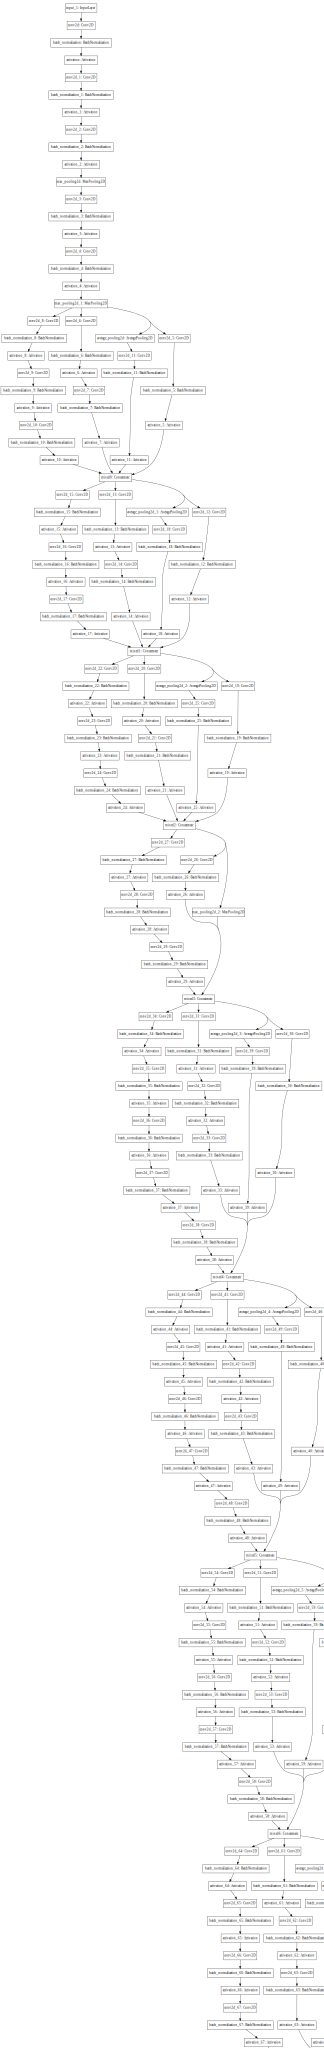

In [ ]:
from IPython.display import SVG
from keras.applications.inception_v3 import InceptionV3
from keras.utils.vis_utils import model_to_dot
inception_model = InceptionV3(weights='imagenet', include_top=False)
SVG(model_to_dot(inception_model).create(prog='dot', format='svg'))

In [ ]:
inc_model = InceptionV3(weights='imagenet', include_top=False)

# get layers and add average pooling layer
x = inc_model.output
x = GlobalAveragePooling2D()(x)

# add fully-connected layer
x = Dense(512, activation='relu')(x)

# add output layer
predictions = Dense(15, activation='softmax')(x)

model = Model(inputs=inc_model.input, outputs=predictions)

# freeze pre-trained model area's layer
for layer in inc_model.layers:
    layer.trainable = False

# update the weight that are added
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(training_set)

# choose the layers which are updated by training
layer_num = len(model.layers)
for layer in model.layers[:279]:
    layer.trainable = False

for layer in model.layers[279:]:
    layer.trainable = True

# training
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=training_set,validation_data=test_set, epochs=5)

 80/103 [======================>.......] - ETA: 8:49 - loss: 3.0389

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


103/103 [==============================] - 2472s 24s/step - loss: 2.7037


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
103/103 [==============================] - 835s 8s/step - loss: 1.1868 - accuracy: 0.6178 - val_loss: 0.9444 - val_accuracy: 0.7019
Epoch 2/5
103/103 [==============================] - 565s 5s/step - loss: 0.8377 - accuracy: 0.7187 - val_loss: 0.6613 - val_accuracy: 0.7776
Epoch 3/5
103/103 [==============================] - 571s 6s/step - loss: 0.7338 - accuracy: 0.7586 - val_loss: 0.6477 - val_accuracy: 0.7909
Epoch 4/5
103/103 [==============================] - 559s 5s/step - loss: 0.6573 - accuracy: 0.7828 - val_loss: 0.5667 - val_accuracy: 0.8113
Epoch 5/5
103/103 [==============================] - 572s 6s/step - loss: 0.5682 - accuracy: 0.8112 - val_loss: 0.5790 - val_accuracy: 0.8065


In [ ]:
history = model.fit(x=training_set,validation_data=test_set,initial_epoch=5, epochs=50)

Epoch 6/50
 48/103 [============>.................] - ETA: 4:32 - loss: 0.5032 - accuracy: 0.8294

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


103/103 [==============================] - 597s 6s/step - loss: 0.5175 - accuracy: 0.8263 - val_loss: 0.5625 - val_accuracy: 0.8293
Epoch 7/50
103/103 [==============================] - 600s 6s/step - loss: 0.4987 - accuracy: 0.8372 - val_loss: 0.5618 - val_accuracy: 0.8257
Epoch 8/50
103/103 [==============================] - 602s 6s/step - loss: 0.4450 - accuracy: 0.8512 - val_loss: 0.5427 - val_accuracy: 0.8353
Epoch 9/50
103/103 [==============================] - 582s 6s/step - loss: 0.4152 - accuracy: 0.8584 - val_loss: 0.4871 - val_accuracy: 0.8498
Epoch 10/50
103/103 [==============================] - 573s 6s/step - loss: 0.4024 - accuracy: 0.8633 - val_loss: 0.5108 - val_accuracy: 0.8389
Epoch 11/50


KeyboardInterrupt: ignored

In [ ]:
model.evaluate()

26/26 [==============================] - 63s 2s/step - loss: 0.5089 - accuracy: 0.8389


[0.508906900882721, 0.838942289352417]

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/unseen_imagenet.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (600, 600))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
pred=model.predict(x)
pred

array([[1.00000000e+00, 2.91320915e-16, 1.60441020e-21, 1.09947729e-27,
        3.67750587e-11, 7.34046998e-33, 1.08431324e-32, 1.85449612e-26,
        2.82197072e-34, 3.07600376e-36, 8.64872781e-25, 6.50002718e-09,
        4.69067947e-16, 1.21391658e-29, 3.90893543e-32]], dtype=float32)

In [ ]:
np.argmax(pred)

0

In [ ]:
training_set.classes[np.argmax(pred)]

0

In [ ]:
training_set.class_indices

{'Bicycle': 0,
 'Bike': 1,
 'Boat': 2,
 'Bus': 3,
 'Car': 4,
 'Cng': 5,
 'Easy-bike': 6,
 'Horse-cart': 7,
 'Launch': 8,
 'Leguna': 9,
 'Rickshaw': 10,
 'Tractor': 11,
 'Truck': 12,
 'Van': 13,
 'Wheelbarrow': 14}

In [ ]:
CLASS_INDEX = None
@keras_modules_injection
def test_my_decode_predictions(*args, **kwargs):
    return my_decode_predictions(*args, **kwargs)


def my_decode_predictions(preds, top=5, **kwargs):
    global CLASS_INDEX

    backend, _, _, keras_utils = get_submodules_from_kwargs(kwargs)

    # if len(preds.shape) != 2 or preds.shape[1] != 1000:
    #     raise ValueError('`decode_predictions` expects '
    #                      'a batch of predictions '
    #                      '(i.e. a 2D array of shape (samples, 1000)). '
    #                      'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = keras_utils.get_file(
            'imagenet_class_index.json',
            CLASS_INDEX_PATH,
            cache_subdir='models',
            file_hash='c2c37ea517e94d9795004a39431a14cb')
        with open(fpath) as f:
            CLASS_INDEX = json.load(f)
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results


print('Predicted: ', test_my_decode_predictions(pred, top=10))

NameError: ignored

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

KeyError: ignored

In [ ]:
model.save_weights('/content/drive/MyDrive/InceptonV3_saved_point/epochs10.h5')